In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

u'C:\\Users\\andersrmr\\Documents\\Python Scripts\\galvanize_prep\\pothole_repair\\sandbox'

In [3]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 2C57-DBDD

 Directory of C:\Users\andersrmr\Documents\Python Scripts\galvanize_prep\pothole_repair\sandbox

09/15/2015  09:33 PM    <DIR>          .
09/15/2015  09:33 PM    <DIR>          ..
09/15/2015  09:33 PM    <DIR>          .ipynb_checkpoints
09/14/2015  11:11 PM           219,385 chloropleth.png
09/15/2015  06:40 PM    <DIR>          data
09/14/2015  03:51 PM           324,491 df_first500.pkl
09/15/2015  10:22 AM           369,554 df_first500_addr.pkl
09/15/2015  12:48 AM           258,153 hexbin.png
09/15/2015  08:46 PM             4,011 Progress_notes
09/15/2015  09:12 PM           189,261 Seattle_data_geocoding.ipynb
09/15/2015  05:09 PM            33,679 Seattle_data_get_socio_economic.ipynb
09/15/2015  09:33 PM           532,411 Seattle_data_pipeline.ipynb
09/15/2015  12:50 AM           477,389 Seattle_mapping.ipynb
               9 File(s)      2,408,334 bytes
               4 Dir(s)  176,328,577,024 bytes free


In [5]:
df = pd.read_csv('data/Pothole_Repairs_Seattle.csv')

###EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26738 entries, 0 to 26737
Data columns (total 15 columns):
OBJECTID         26738 non-null int64
WOKEY            26738 non-null int64
WO_STATUS        26738 non-null object
LAST90DAYRPRD    26738 non-null int64
CURRENT_QTR      26738 non-null int64
PREVIOUS_1QTR    26738 non-null int64
PREVIOUS_2QTR    26738 non-null int64
PREVIOUS_3QTR    26738 non-null int64
PREVIOUS_4QTR    26738 non-null int64
INITDT           26738 non-null object
FLDSTARTDT       26719 non-null object
FLDENDDT         26717 non-null object
LOCATION         26738 non-null object
ADDRDESC         26738 non-null object
SHAPE            0 non-null float64
dtypes: float64(1), int64(8), object(6)
memory usage: 3.3+ MB


In [7]:
df.head()

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE
0,1,2456,COMPLETED,0,0,0,0,0,0,03/29/2010 07:00:00 AM +0000,04/06/2010 07:00:00 AM +0000,04/06/2010 07:00:00 AM +0000,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,NaN
1,2,2514,COMPLETED,0,0,0,0,0,0,03/30/2010 07:00:00 AM +0000,04/01/2010 07:00:00 AM +0000,04/01/2010 07:00:00 AM +0000,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,NaN
2,3,2649,COMPLETED,0,0,0,0,0,0,03/31/2010 07:00:00 AM +0000,04/01/2010 07:00:00 AM +0000,04/01/2010 07:00:00 AM +0000,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,NaN
3,4,1591,COMPLETED,0,0,0,0,0,0,03/15/2010 07:00:00 AM +0000,03/16/2010 07:00:00 AM +0000,03/16/2010 07:00:00 AM +0000,Charles st & 6 Ave S pothole next to traffic l...,S CHARLES ST BETWEEN 6TH AVE S AND MAYNARD AVE...,NaN
4,5,1680,COMPLETED,0,0,0,0,0,0,03/16/2010 07:00:00 AM +0000,03/17/2010 07:00:00 AM +0000,03/17/2010 07:00:00 AM +0000,N 80th St between Corliss Ave N and 2nd Ave NE...,N 80TH ST BETWEEN CORLISS (W LEG) AVE N AND CO...,NaN


In [8]:
df.ix[0,'ADDRDESC'], df.ix[0,'LOCATION'] #Plotting these on a map without GIS coords is a real problem.

('HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYON ST                                                                                                                                                                                                             ',
 'Holden pl SW bt  SW Kenyon Holden                                                                                                                                                                                                                              ')

In [9]:
#Want to make this a time-date object, then look at the distribution of differences between start and end dates
df.ix[0:5,'FLDSTARTDT'], df.ix[0:5, 'FLDENDDT']

(0    04/06/2010 07:00:00 AM +0000
 1    04/01/2010 07:00:00 AM +0000
 2    04/01/2010 07:00:00 AM +0000
 3    03/16/2010 07:00:00 AM +0000
 4    03/17/2010 07:00:00 AM +0000
 5    04/22/2010 07:00:00 AM +0000
 Name: FLDSTARTDT, dtype: object, 0    04/06/2010 07:00:00 AM +0000
 1    04/01/2010 07:00:00 AM +0000
 2    04/01/2010 07:00:00 AM +0000
 3    03/16/2010 07:00:00 AM +0000
 4    03/17/2010 07:00:00 AM +0000
 5    04/22/2010 07:00:00 AM +0000
 Name: FLDENDDT, dtype: object)

In [10]:
df.ix[0:5,'INITDT'], df.ix[0:5, 'FLDENDDT']

(0    03/29/2010 07:00:00 AM +0000
 1    03/30/2010 07:00:00 AM +0000
 2    03/31/2010 07:00:00 AM +0000
 3    03/15/2010 07:00:00 AM +0000
 4    03/16/2010 07:00:00 AM +0000
 5    04/19/2010 07:00:00 AM +0000
 Name: INITDT, dtype: object, 0    04/06/2010 07:00:00 AM +0000
 1    04/01/2010 07:00:00 AM +0000
 2    04/01/2010 07:00:00 AM +0000
 3    03/16/2010 07:00:00 AM +0000
 4    03/17/2010 07:00:00 AM +0000
 5    04/22/2010 07:00:00 AM +0000
 Name: FLDENDDT, dtype: object)

In [11]:
df.ix[0:5,'INITDT']

0    03/29/2010 07:00:00 AM +0000
1    03/30/2010 07:00:00 AM +0000
2    03/31/2010 07:00:00 AM +0000
3    03/15/2010 07:00:00 AM +0000
4    03/16/2010 07:00:00 AM +0000
5    04/19/2010 07:00:00 AM +0000
Name: INITDT, dtype: object

####Make DateTime objects

In [12]:
pd.to_datetime(df.ix[0:5, 'INITDT'].str.strip())

0   2010-03-29 07:00:00
1   2010-03-30 07:00:00
2   2010-03-31 07:00:00
3   2010-03-15 07:00:00
4   2010-03-16 07:00:00
5   2010-04-19 07:00:00
Name: INITDT, dtype: datetime64[ns]

In [13]:
pd.to_datetime(df.ix[0:5,'INITDT'])

0   2010-03-29 07:00:00
1   2010-03-30 07:00:00
2   2010-03-31 07:00:00
3   2010-03-15 07:00:00
4   2010-03-16 07:00:00
5   2010-04-19 07:00:00
Name: INITDT, dtype: datetime64[ns]

In [14]:
df['FLDSTARTDT_dt'] = pd.to_datetime(df['FLDSTARTDT'])

In [15]:
df['INITDT_dt'] = pd.to_datetime(df['INITDT'])
df['FLDENDDT_dt'] = pd.to_datetime(df['FLDENDDT'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26738 entries, 0 to 26737
Data columns (total 18 columns):
OBJECTID         26738 non-null int64
WOKEY            26738 non-null int64
WO_STATUS        26738 non-null object
LAST90DAYRPRD    26738 non-null int64
CURRENT_QTR      26738 non-null int64
PREVIOUS_1QTR    26738 non-null int64
PREVIOUS_2QTR    26738 non-null int64
PREVIOUS_3QTR    26738 non-null int64
PREVIOUS_4QTR    26738 non-null int64
INITDT           26738 non-null object
FLDSTARTDT       26719 non-null object
FLDENDDT         26717 non-null object
LOCATION         26738 non-null object
ADDRDESC         26738 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26719 non-null datetime64[ns]
INITDT_dt        26738 non-null datetime64[ns]
FLDENDDT_dt      26717 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(8), object(6)
memory usage: 3.9+ MB


In [17]:
df.ix[0:5,'INITDT_dt'], df.ix[0:5, 'FLDENDDT_dt']

(0   2010-03-29 07:00:00
 1   2010-03-30 07:00:00
 2   2010-03-31 07:00:00
 3   2010-03-15 07:00:00
 4   2010-03-16 07:00:00
 5   2010-04-19 07:00:00
 Name: INITDT_dt, dtype: datetime64[ns], 0   2010-04-06 07:00:00
 1   2010-04-01 07:00:00
 2   2010-04-01 07:00:00
 3   2010-03-16 07:00:00
 4   2010-03-17 07:00:00
 5   2010-04-22 07:00:00
 Name: FLDENDDT_dt, dtype: datetime64[ns])

In [18]:
df[pd.isnull(df.INITDT_dt)]

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE,FLDSTARTDT_dt,INITDT_dt,FLDENDDT_dt


In [19]:
df.INITDT_dt.describe()

count                   26738
unique                   1943
top       2011-01-13 08:00:00
freq                      172
first     2010-03-11 08:00:00
last      2015-08-26 07:00:00
Name: INITDT_dt, dtype: object

In [20]:
df.FLDENDDT_dt.describe()

count                   26717
unique                   1871
top       2011-02-01 08:00:00
freq                      145
first     2001-03-28 08:00:00
last      2015-08-25 07:00:00
Name: FLDENDDT_dt, dtype: object

In [21]:
df.tail()

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE,FLDSTARTDT_dt,INITDT_dt,FLDENDDT_dt
26733,26734,317782,COMPLETED,0,0,0,0,1,0,12/10/2014 08:00:00 AM +0000,12/17/2014 08:00:00 AM +0000,12/17/2014 08:00:00 AM +0000,"6815 WEEDIN PL NE, SEATTLE, WA ...",WEEDIN PL NE BETWEEN NE 68TH ST AND NE 69TH ST...,NaN,2014-12-17 08:00:00,2014-12-10 08:00:00,2014-12-17 08:00:00
26734,26735,315019,COMPLETED,0,0,0,0,1,0,11/27/2014 08:00:00 AM +0000,11/27/2014 08:00:00 AM +0000,11/27/2014 08:00:00 AM +0000,3113 Elliot Ave ...,ELLIOTT AVE BETWEEN BAY ST AND W DENNY WAY ...,NaN,2014-11-27 08:00:00,2014-11-27 08:00:00,2014-11-27 08:00:00
26735,26736,315343,COMPLETED,0,0,0,0,2,0,11/30/2014 08:00:00 AM +0000,11/30/2014 08:00:00 AM +0000,11/30/2014 08:00:00 AM +0000,55 NickersonST ...,NICKERSON ST BETWEEN CREMONA ST AND DRAVUS ST ...,NaN,2014-11-30 08:00:00,2014-11-30 08:00:00,2014-11-30 08:00:00
26736,26737,313560,COMPLETED,0,0,0,0,9,0,11/20/2014 08:00:00 AM +0000,11/24/2014 08:00:00 AM +0000,11/24/2014 08:00:00 AM +0000,805 NW 42ND ST ...,NW 42ND ST BETWEEN 7TH AVE NW AND 9TH AVE NW ...,NaN,2014-11-24 08:00:00,2014-11-20 08:00:00,2014-11-24 08:00:00
26737,26738,315122,COMPLETED,0,0,0,0,1,0,11/28/2014 08:00:00 AM +0000,12/02/2014 08:00:00 AM +0000,12/02/2014 08:00:00 AM +0000,...,39TH AVE S BETWEEN S GENESEE ST AND S OREGON S...,NaN,2014-12-02 08:00:00,2014-11-28 08:00:00,2014-12-02 08:00:00


In [22]:
df.WO_STATUS.value_counts()

COMPLETED               26717
PENDING WORK REQUEST       19
WORK STARTED                2
dtype: int64

In [23]:
df[df.WO_STATUS == 'PENDING WORK REQUEST']

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE,FLDSTARTDT_dt,INITDT_dt,FLDENDDT_dt
198,199,379869,PENDING WORK REQUEST,0,0,0,0,0,0,08/25/2015 07:00:00 AM +0000,NaN,NaN,Lake City Way NE & NE 91st St ...,LAKE CITY WAY NE BETWEEN NE 91ST ST AND NE 92N...,NaN,NaT,2015-08-25 07:00:00,NaT
199,200,379518,PENDING WORK REQUEST,0,0,0,0,0,0,08/23/2015 07:00:00 AM +0000,NaN,NaN,4624 S Mead ...,S MEAD ST BETWEEN 46TH AVE S AND 48TH AVE S ...,NaN,NaT,2015-08-23 07:00:00,NaT
200,201,380094,PENDING WORK REQUEST,0,0,0,0,0,0,08/26/2015 07:00:00 AM +0000,NaN,NaN,California Ave SW & SW Dakota ...,CALIFORNIA AVE SW BETWEEN SW DAKOTA ST AND SW ...,NaN,NaT,2015-08-26 07:00:00,NaT
209,210,378901,PENDING WORK REQUEST,0,0,0,0,0,0,08/19/2015 07:00:00 AM +0000,NaN,NaN,"2648 E ALOHA ST, SEATTLE, WA ...",E ALOHA ST BETWEEN 26TH AVE E AND 28TH AVE E ...,NaN,NaT,2015-08-19 07:00:00,NaT
225,226,378048,PENDING WORK REQUEST,0,0,0,0,0,0,08/14/2015 07:00:00 AM +0000,NaN,NaN,333 18th E ...,18TH AVE E BETWEEN E THOMAS ST AND E HARRISON ...,NaN,NaT,2015-08-14 07:00:00,NaT
228,229,379460,PENDING WORK REQUEST,1,1,1,1,0,0,08/22/2015 07:00:00 AM +0000,NaN,NaN,NE56 st to Ravenna blvd ...,NE 56TH ST BETWEEN 17TH (NB) AVE NE AND NE RAV...,NaN,NaT,2015-08-22 07:00:00,NaT
3470,3471,379632,PENDING WORK REQUEST,0,0,0,0,0,0,08/24/2015 07:00:00 AM +0000,NaN,NaN,2487 NE 97th st ...,NE 98TH ST BETWEEN LAKE CITY WAY NE AND RAVENN...,NaN,NaT,2015-08-24 07:00:00,NaT
3482,3483,380215,PENDING WORK REQUEST,0,0,0,0,0,0,08/26/2015 07:00:00 AM +0000,NaN,NaN,Left lane northbound just south of Boyer ...,BOYER AVE E BETWEEN 25TH AVE E AND 24TH AVE E ...,NaN,NaT,2015-08-26 07:00:00,NaT
10069,10070,380147,PENDING WORK REQUEST,0,0,0,0,0,0,08/26/2015 07:00:00 AM +0000,NaN,NaN,24th Ave W & W Commodore Way ...,24TH AVE W BETWEEN W JAMESON ST AND W COMMODOR...,NaN,NaT,2015-08-26 07:00:00,NaT
10070,10071,380213,PENDING WORK REQUEST,0,0,0,0,0,0,08/26/2015 07:00:00 AM +0000,NaN,NaN,...,WEST GREEN LAKE WAY N BETWEEN N 63RD ST AND AU...,NaN,NaT,2015-08-26 07:00:00,NaT


In [24]:
df[df.WO_STATUS == 'WORK STARTED']

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE,FLDSTARTDT_dt,INITDT_dt,FLDENDDT_dt
13489,13490,375605,WORK STARTED,3,3,3,3,0,0,07/31/2015 07:00:00 AM +0000,08/04/2015 07:00:00 AM +0000,NaN,...,28TH AVE E BETWEEN E WARD ST AND E HELEN ST ...,NaN,2015-08-04 07:00:00,2015-07-31 07:00:00,NaT
26280,26281,353957,WORK STARTED,0,0,0,0,0,0,05/21/2015 07:00:00 AM +0000,05/27/2015 07:00:00 AM +0000,NaN,...,55TH AVE NE BETWEEN NE 73RD ST AND NE 74TH ST ...,NaN,2015-05-27 07:00:00,2015-05-21 07:00:00,NaT


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26738 entries, 0 to 26737
Data columns (total 18 columns):
OBJECTID         26738 non-null int64
WOKEY            26738 non-null int64
WO_STATUS        26738 non-null object
LAST90DAYRPRD    26738 non-null int64
CURRENT_QTR      26738 non-null int64
PREVIOUS_1QTR    26738 non-null int64
PREVIOUS_2QTR    26738 non-null int64
PREVIOUS_3QTR    26738 non-null int64
PREVIOUS_4QTR    26738 non-null int64
INITDT           26738 non-null object
FLDSTARTDT       26719 non-null object
FLDENDDT         26717 non-null object
LOCATION         26738 non-null object
ADDRDESC         26738 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26719 non-null datetime64[ns]
INITDT_dt        26738 non-null datetime64[ns]
FLDENDDT_dt      26717 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(8), object(6)
memory usage: 3.9+ MB


In [26]:
df['IS_COMPLETED'] = df['WO_STATUS'] == 'COMPLETED'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26738 entries, 0 to 26737
Data columns (total 19 columns):
OBJECTID         26738 non-null int64
WOKEY            26738 non-null int64
WO_STATUS        26738 non-null object
LAST90DAYRPRD    26738 non-null int64
CURRENT_QTR      26738 non-null int64
PREVIOUS_1QTR    26738 non-null int64
PREVIOUS_2QTR    26738 non-null int64
PREVIOUS_3QTR    26738 non-null int64
PREVIOUS_4QTR    26738 non-null int64
INITDT           26738 non-null object
FLDSTARTDT       26719 non-null object
FLDENDDT         26717 non-null object
LOCATION         26738 non-null object
ADDRDESC         26738 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26719 non-null datetime64[ns]
INITDT_dt        26738 non-null datetime64[ns]
FLDENDDT_dt      26717 non-null datetime64[ns]
IS_COMPLETED     26738 non-null bool
dtypes: bool(1), datetime64[ns](3), float64(1), int64(8), object(6)
memory usage: 3.9+ MB


In [28]:
np.any(df.INITDT_dt > df.FLDENDDT_dt) #This may be a problem!

True

In [29]:
sum(df.INITDT_dt > df.FLDENDDT_dt)

508

####A small number of work orders have not been completed.  I examined these and discovered they are the most recent jobs.  Makes most sense to drop them.

In [30]:
df_compl = df[df['IS_COMPLETED'] == True]

In [31]:
sum(df_compl.INITDT_dt > df_compl.FLDENDDT_dt)

487

In [32]:
df_compl['DATE_REVERSE'] = df_compl.INITDT_dt > df_compl.FLDENDDT_dt

C:\Users\andersrmr\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df_compl['DATE_REVERSE'].value_counts()

False    26230
True       487
dtype: int64

In [34]:
df_compl[df_compl['DATE_REVERSE'] == True]

,OBJECTID,WOKEY,WO_STATUS,LAST90DAYRPRD,CURRENT_QTR,PREVIOUS_1QTR,PREVIOUS_2QTR,PREVIOUS_3QTR,PREVIOUS_4QTR,INITDT,FLDSTARTDT,FLDENDDT,LOCATION,ADDRDESC,SHAPE,FLDSTARTDT_dt,INITDT_dt,FLDENDDT_dt,IS_COMPLETED,DATE_REVERSE
11,12,6846,COMPLETED,0,0,0,0,0,0,04/27/2010 07:00:00 AM +0000,04/26/2010 07:00:00 AM +0000,04/26/2010 07:00:00 AM +0000,actual patch between 104th and 105th ...,DAYTON AVE N AND N 104TH ST ...,NaN,2010-04-26 07:00:00,2010-04-27 07:00:00,2010-04-26 07:00:00,True,True
81,82,345656,COMPLETED,0,0,2,2,0,0,04/20/2015 07:00:00 AM +0000,04/16/2015 07:00:00 AM +0000,04/16/2015 07:00:00 AM +0000,3rd Ave Between Blanchard St & Bell St ...,3RD AVE BETWEEN BLANCHARD ST AND BELL ST ...,NaN,2015-04-16 07:00:00,2015-04-20 07:00:00,2015-04-16 07:00:00,True,True
144,145,320641,COMPLETED,0,0,0,0,1,0,12/19/2014 08:00:00 AM +0000,12/18/2014 08:00:00 AM +0000,12/18/2014 08:00:00 AM +0000,23rd ave and Yesler way ...,23RD AVE BETWEEN E YESLER WAY AND E FIR ST ...,NaN,2014-12-18 08:00:00,2014-12-19 08:00:00,2014-12-18 08:00:00,True,True
287,288,370302,COMPLETED,20,20,20,20,0,0,07/10/2015 07:00:00 AM +0000,07/09/2015 07:00:00 AM +0000,07/09/2015 07:00:00 AM +0000,...,5TH AVE S BETWEEN S AUSTIN ST AND S HOLDEN ST ...,NaN,2015-07-09 07:00:00,2015-07-10 07:00:00,2015-07-09 07:00:00,True,True
558,559,193702,COMPLETED,0,0,0,0,0,0,03/30/2013 07:00:00 AM +0000,03/29/2013 07:00:00 AM +0000,03/29/2013 07:00:00 AM +0000,4612 Sandpoint Way NE ...,SAND POINT WAY NE BETWEEN NE 45TH ST AND 40TH ...,NaN,2013-03-29 07:00:00,2013-03-30 07:00:00,2013-03-29 07:00:00,True,True
590,591,317546,COMPLETED,0,0,0,0,4,0,12/10/2014 08:00:00 AM +0000,12/11/2014 08:00:00 AM +0000,12/01/2014 08:00:00 AM +0000,Near sewer cover at traffic circle ...,E GALER ST BETWEEN FEDERAL AVE E AND DEAD END ...,NaN,2014-12-11 08:00:00,2014-12-10 08:00:00,2014-12-01 08:00:00,True,True
711,712,199647,COMPLETED,0,0,0,0,0,0,05/16/2013 07:00:00 AM +0000,05/15/2013 07:00:00 AM +0000,05/15/2013 07:00:00 AM +0000,...,11TH AVE SW AND SW SPOKANE (N RD) ST ...,NaN,2013-05-15 07:00:00,2013-05-16 07:00:00,2013-05-15 07:00:00,True,True
868,869,155473,COMPLETED,0,0,0,0,0,0,07/04/2012 07:00:00 AM +0000,07/03/2012 07:00:00 AM +0000,07/03/2012 07:00:00 AM +0000,3016 Admiral Way SW ...,SW ADMIRAL WAY BETWEEN SW ADMIRAL (AVALON RP) ...,NaN,2012-07-03 07:00:00,2012-07-04 07:00:00,2012-07-03 07:00:00,True,True
908,909,237951,COMPLETED,0,0,0,0,0,0,11/25/2013 08:00:00 AM +0000,11/25/2013 08:00:00 AM +0000,11/24/2013 08:00:00 AM +0000,NW corner of 25th ave S and Grand.\n\n ...,S GRAND ST BETWEEN 24TH AVE S AND 25TH AVE S ...,NaN,2013-11-25 08:00:00,2013-11-25 08:00:00,2013-11-24 08:00:00,True,True
916,917,261177,COMPLETED,0,0,0,0,0,0,03/06/2014 08:00:00 AM +0000,03/06/2014 08:00:00 AM +0000,03/05/2014 08:00:00 AM +0000,"2362 FAIRVIEW AVE E, SEATTLE, WA 98102 ...",FAIRVIEW AVE E BETWEEN E LYNN ST AND E ROANOKE...,NaN,2014-03-06 08:00:00,2014-03-06 08:00:00,2014-03-05 08:00:00,True,True


In [35]:
sum(df_compl['DATE_REVERSE'])/float(len(df_compl['DATE_REVERSE']))

0.018228094471684695

####About 1.8% have bad dates: initialized after they were ended.  Drop them for now.

In [36]:
df_clean = df_compl[df_compl['DATE_REVERSE'] == False]

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26230 entries, 0 to 26737
Data columns (total 20 columns):
OBJECTID         26230 non-null int64
WOKEY            26230 non-null int64
WO_STATUS        26230 non-null object
LAST90DAYRPRD    26230 non-null int64
CURRENT_QTR      26230 non-null int64
PREVIOUS_1QTR    26230 non-null int64
PREVIOUS_2QTR    26230 non-null int64
PREVIOUS_3QTR    26230 non-null int64
PREVIOUS_4QTR    26230 non-null int64
INITDT           26230 non-null object
FLDSTARTDT       26230 non-null object
FLDENDDT         26230 non-null object
LOCATION         26230 non-null object
ADDRDESC         26230 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26230 non-null datetime64[ns]
INITDT_dt        26230 non-null datetime64[ns]
FLDENDDT_dt      26230 non-null datetime64[ns]
IS_COMPLETED     26230 non-null bool
DATE_REVERSE     26230 non-null bool
dtypes: bool(2), datetime64[ns](3), float64(1), int64(8), object(6)
memory usage: 3.9+ MB


####Now let's look at the distribution of work order duration times

In [38]:
df_clean['DURATION'] = df_clean.FLDENDDT_dt - df_clean.INITDT_dt

C:\Users\andersrmr\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
df_clean['DURATION'].describe()

count                       26230
mean     -4 days +08:57:55.986515
std       13 days 14:57:23.951845
min               0 days 00:00:00
25%               0 days 00:00:00
50%               2 days 00:00:00
75%               5 days 00:00:00
max            1673 days 01:00:00
Name: DURATION, dtype: object

In [1]:
df_clean['DURATION'].value_counts()

NameError: name 'df_clean' is not defined

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26230 entries, 0 to 26737
Data columns (total 21 columns):
OBJECTID         26230 non-null int64
WOKEY            26230 non-null int64
WO_STATUS        26230 non-null object
LAST90DAYRPRD    26230 non-null int64
CURRENT_QTR      26230 non-null int64
PREVIOUS_1QTR    26230 non-null int64
PREVIOUS_2QTR    26230 non-null int64
PREVIOUS_3QTR    26230 non-null int64
PREVIOUS_4QTR    26230 non-null int64
INITDT           26230 non-null object
FLDSTARTDT       26230 non-null object
FLDENDDT         26230 non-null object
LOCATION         26230 non-null object
ADDRDESC         26230 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26230 non-null datetime64[ns]
INITDT_dt        26230 non-null datetime64[ns]
FLDENDDT_dt      26230 non-null datetime64[ns]
IS_COMPLETED     26230 non-null bool
DATE_REVERSE     26230 non-null bool
DURATION         26230 non-null timedelta64[ns]
dtypes: bool(2), datetime64[ns](3), float64(1), int64(

In [41]:
df_clean['DURATION'].astype('timedelta64[D]').describe()

count    26230.000000
mean         4.501067
std         13.613802
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1673.000000
Name: DURATION, dtype: float64

In [42]:
df_clean['DURATION'].astype('timedelta64[D]').value_counts()

0       7106
1       5906
2       2651
3       2026
4       1716
5       1518
6       1111
7        688
8        415
13       226
9        225
11       195
12       182
10       177
14       162
20       134
15       125
16       110
21       107
19       106
17       102
18        90
22        85
23        64
25        59
28        57
24        55
27        54
26        53
29        51
        ... 
83         3
74         3
68         3
65         3
64         3
88         2
103        2
70         2
72         2
80         2
99         2
248        1
198        1
148        1
139        1
136        1
133        1
130        1
122        1
67         1
101        1
90         1
66         1
307        1
79         1
78         1
76         1
73         1
69         1
1673       1
dtype: int64

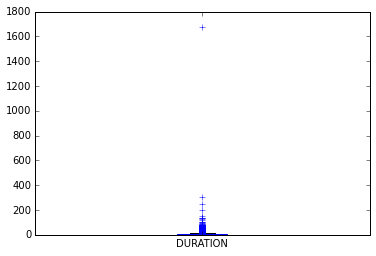

In [43]:
# df_clean['DURATION'].astype('timedelta64[D]')[df_clean['DURATION']<1673].hist(bins=50)
# df_clean['DURATION'].astype('timedelta64[D]').plot(kind='hist',alpha=0.5)
# (df_clean['DURATION'] / pd.Timedelta(days=1)).hist(bins=50)
# df_clean['DURATION'].astype('timedelta64[D]').plot(kind='bar')
df_clean['DURATION'].astype('timedelta64[D]').plot(kind='box')

In [44]:
df_clean['DURATION']

0        8 days
1        2 days
2        1 days
3        1 days
4        1 days
5        3 days
6        1 days
7        0 days
8        0 days
9        4 days
10       4 days
12       5 days
13       4 days
14       4 days
15       1 days
16       2 days
17       0 days
18       3 days
19       4 days
20       1 days
21       1 days
22       0 days
23       1 days
24       1 days
25       1 days
26       1 days
27       0 days
28       5 days
29       5 days
30       0 days
          ...  
26707    3 days
26708    1 days
26709    1 days
26710    5 days
26711    4 days
26712    1 days
26713    1 days
26714    4 days
26715    5 days
26716    1 days
26717    1 days
26718    1 days
26720    0 days
26721    1 days
26722    5 days
26723    1 days
26724    2 days
26725    3 days
26726   12 days
26727    2 days
26728    0 days
26729    6 days
26730    8 days
26731    0 days
26732    2 days
26733    7 days
26734    0 days
26735    0 days
26736    4 days
26737    4 days
Name: DURATION, dtype: t

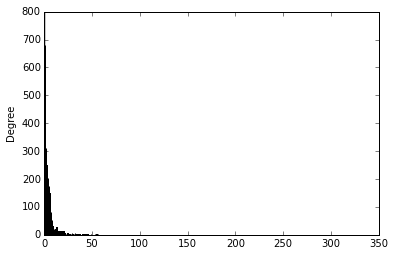

In [45]:
df_clean['DURATION'][:3000].astype('timedelta64[D]').plot(kind='hist',bins=500)

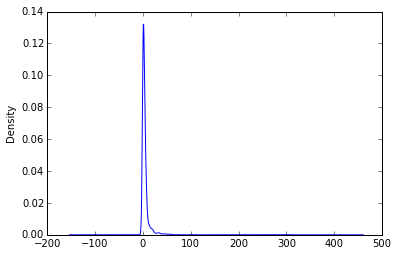

In [46]:
df_clean['DURATION'][:3000].astype('timedelta64[D]').plot(kind='kde')

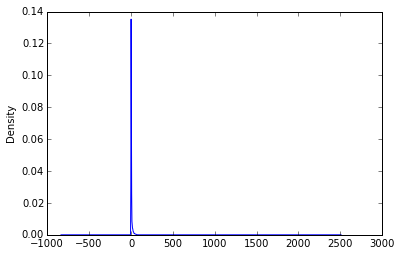

In [47]:
df_clean['DURATION'].astype('timedelta64[D]').plot(kind='kde')

####Need to subset data, examine values in a lower range

In [48]:
len(df_clean['DURATION'])

26230

In [49]:
len(df_clean['DURATION'][df_clean['DURATION'] <= '12 days'])

23903

In [50]:
duration_lte_12 =df_clean['DURATION'][df_clean['DURATION'] <= '12 days']

In [51]:
type(duration_lte_12)

pandas.core.series.Series

In [52]:
duration_lte_12.describe()

count                     23903
mean     2 days 06:57:17.945027
std      2 days 14:14:58.206753
min             0 days 00:00:00
25%             0 days 00:00:00
50%             1 days 00:00:00
75%             4 days 00:00:00
max            12 days 00:00:00
Name: DURATION, dtype: object

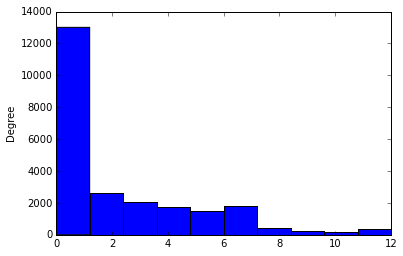

In [53]:
duration_lte_12.astype('timedelta64[D]').plot(kind='hist')

In [54]:
duration_lte_12.astype('timedelta64[D]').value_counts()

0     7106
1     5906
2     2651
3     2026
4     1716
5     1518
6     1111
7      688
8      415
9      225
11     195
10     177
12     169
dtype: int64

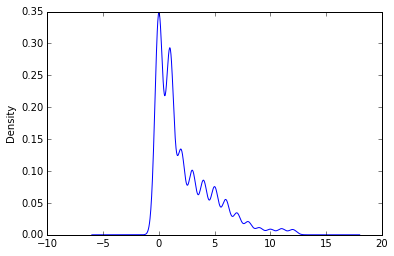

In [55]:
duration_lte_12.astype('timedelta64[D]').plot(kind='kde')

In [56]:
duration_lte_20 =df_clean['DURATION'][df_clean['DURATION'] <= '20 days']

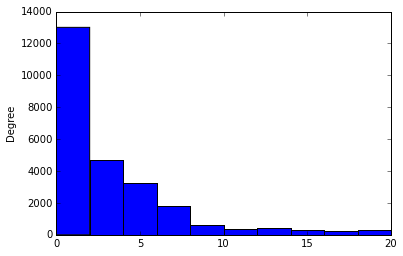

In [57]:
duration_lte_20.astype('timedelta64[D]').plot(kind='hist')

In [58]:
def plot_windows():
    windows = xrange(5,30,1)
    for window in windows:
        vals = df_clean['DURATION'][df_clean['DURATION'] <= '{0} days'.format(window)]
        vals.astype('timedelta64[D]').plot(kind='hist', x='{0} days'.format(window))
        plt.show()

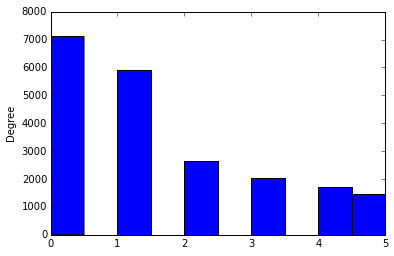

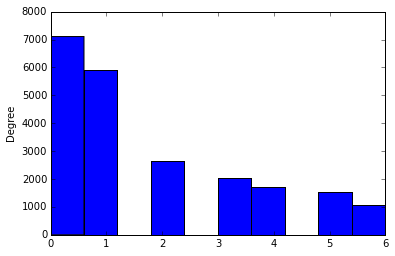

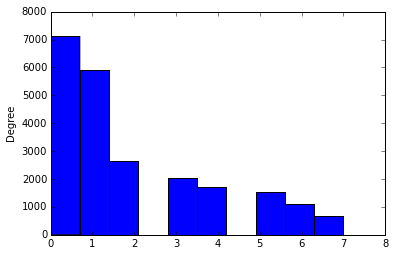

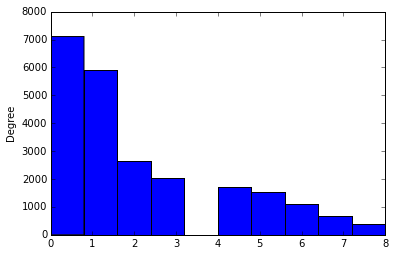

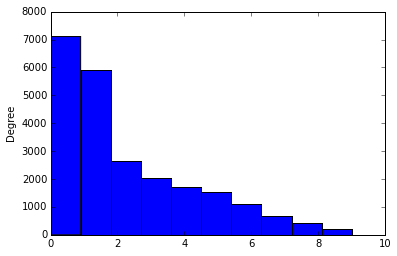

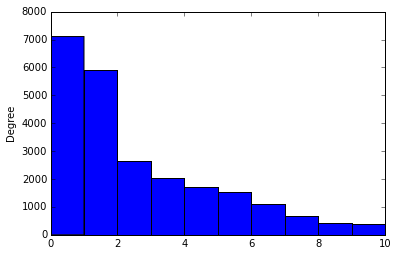

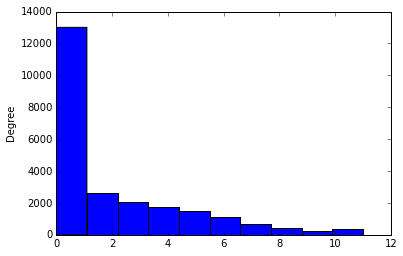

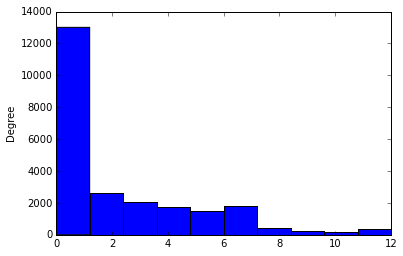

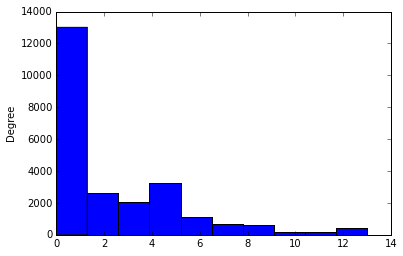

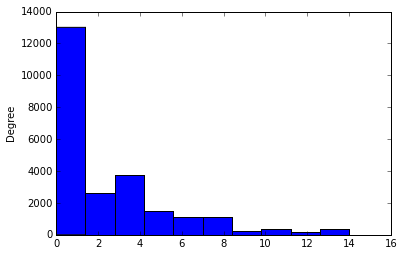

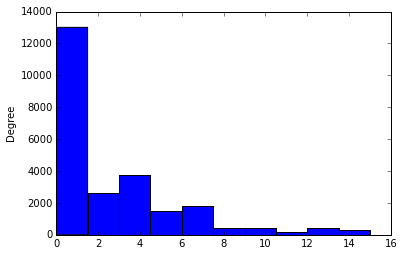

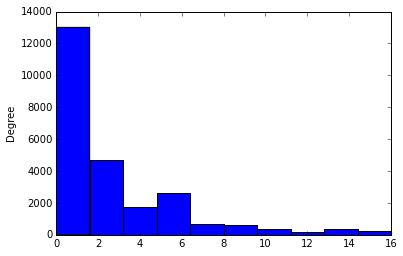

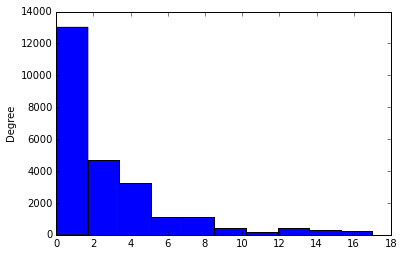

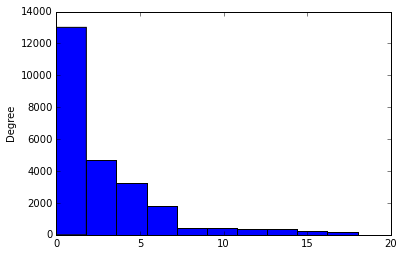

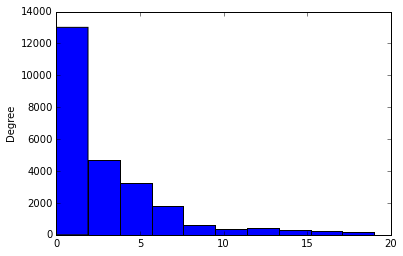

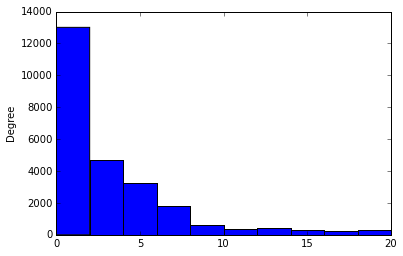

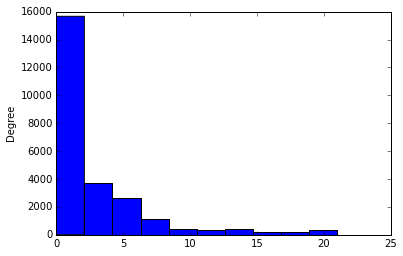

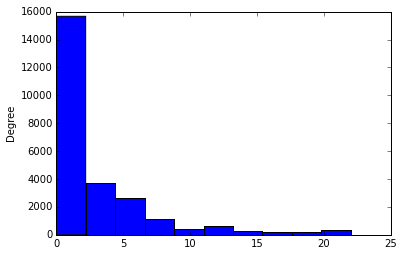

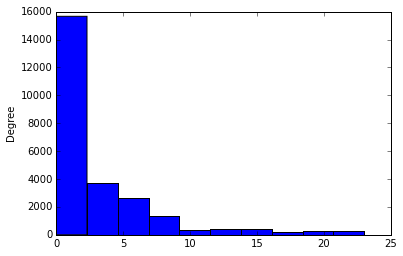

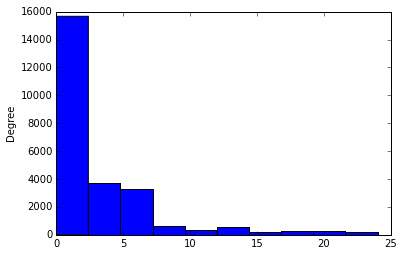

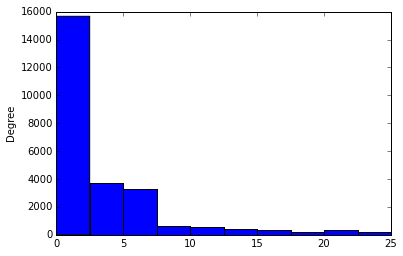

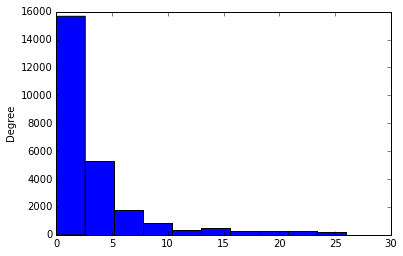

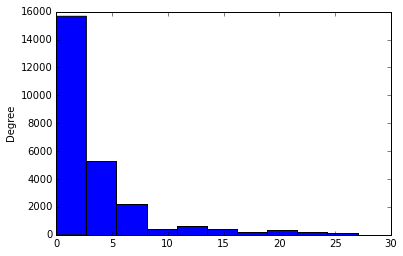

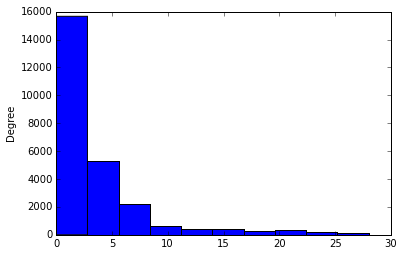

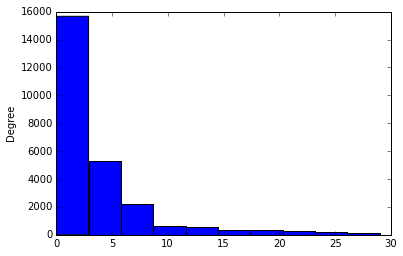

In [59]:
plot_windows()

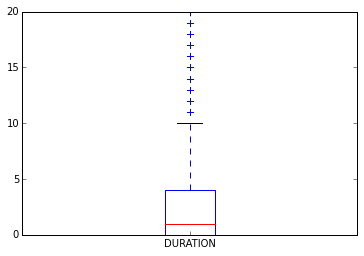

In [60]:
duration_lte_20.astype('timedelta64[D]').plot(kind='box')

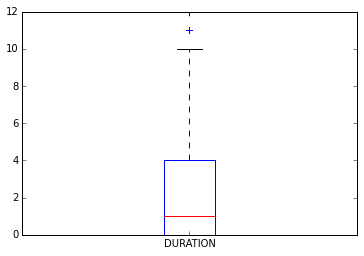

In [61]:
duration_lte_12.astype('timedelta64[D]').plot(kind='box')

In [62]:
df_clean['DURATION_td'] = df_clean['DURATION'].astype('timedelta64[D]')

C:\Users\andersrmr\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26230 entries, 0 to 26737
Data columns (total 22 columns):
OBJECTID         26230 non-null int64
WOKEY            26230 non-null int64
WO_STATUS        26230 non-null object
LAST90DAYRPRD    26230 non-null int64
CURRENT_QTR      26230 non-null int64
PREVIOUS_1QTR    26230 non-null int64
PREVIOUS_2QTR    26230 non-null int64
PREVIOUS_3QTR    26230 non-null int64
PREVIOUS_4QTR    26230 non-null int64
INITDT           26230 non-null object
FLDSTARTDT       26230 non-null object
FLDENDDT         26230 non-null object
LOCATION         26230 non-null object
ADDRDESC         26230 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    26230 non-null datetime64[ns]
INITDT_dt        26230 non-null datetime64[ns]
FLDENDDT_dt      26230 non-null datetime64[ns]
IS_COMPLETED     26230 non-null bool
DATE_REVERSE     26230 non-null bool
DURATION         26230 non-null timedelta64[ns]
DURATION_td      26230 non-null float64
dtypes: bool(2

In [64]:
df_clean['DURATION_td'].describe()

count    26230.000000
mean         4.501067
std         13.613802
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1673.000000
Name: DURATION_td, dtype: float64

####Actually, all the zeros are suspicious.  How can the repair take 0 days?  Maybe those should be removed as well.

In [65]:
len(df_clean)

26230

In [66]:
len(df_clean[df_clean['DURATION'] == '0 days'])

7087

In [67]:
len(df_clean[df_clean['DURATION_td'] == 0])

7106

####There is a difference between the DURATION and DURATION_td columns

In [68]:
df_clean[df_clean['DURATION'] == '0 days'][['INITDT','FLDENDDT']].head(50)

,INITDT,FLDENDDT
7,04/13/2010 07:00:00 AM +0000,04/13/2010 07:00:00 AM +0000
8,04/29/2010 07:00:00 AM +0000,04/29/2010 07:00:00 AM +0000
17,03/29/2010 07:00:00 AM +0000,03/29/2010 07:00:00 AM +0000
22,04/19/2010 07:00:00 AM +0000,04/19/2010 07:00:00 AM +0000
27,03/12/2015 07:00:00 AM +0000,03/12/2015 07:00:00 AM +0000
30,03/16/2015 07:00:00 AM +0000,03/16/2015 07:00:00 AM +0000
31,03/17/2015 07:00:00 AM +0000,03/17/2015 07:00:00 AM +0000
33,04/22/2010 07:00:00 AM +0000,04/22/2010 07:00:00 AM +0000
34,03/24/2015 07:00:00 AM +0000,03/24/2015 07:00:00 AM +0000
35,04/28/2010 07:00:00 AM +0000,04/28/2010 07:00:00 AM +0000


In [69]:
df_clean[df_clean['DURATION'] == '0 days'][['INITDT','FLDENDDT']].tail(50)

,INITDT,FLDENDDT
26493,02/05/2015 08:00:00 AM +0000,02/05/2015 08:00:00 AM +0000
26494,10/18/2014 07:00:00 AM +0000,10/18/2014 07:00:00 AM +0000
26512,03/08/2015 08:00:00 AM +0000,03/08/2015 08:00:00 AM +0000
26516,02/23/2015 08:00:00 AM +0000,02/23/2015 08:00:00 AM +0000
26518,10/15/2014 07:00:00 AM +0000,10/15/2014 07:00:00 AM +0000
26527,03/11/2015 07:00:00 AM +0000,03/11/2015 07:00:00 AM +0000
26536,07/10/2015 07:00:00 AM +0000,07/10/2015 07:00:00 AM +0000
26541,06/24/2015 07:00:00 AM +0000,06/24/2015 07:00:00 AM +0000
26550,07/13/2015 07:00:00 AM +0000,07/13/2015 07:00:00 AM +0000
26551,06/26/2015 07:00:00 AM +0000,06/26/2015 07:00:00 AM +0000


In [70]:
df_clean_nozeros = df_clean[df_clean['DURATION'] != '0 days']

In [71]:
df_clean_nozeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19143 entries, 0 to 26737
Data columns (total 22 columns):
OBJECTID         19143 non-null int64
WOKEY            19143 non-null int64
WO_STATUS        19143 non-null object
LAST90DAYRPRD    19143 non-null int64
CURRENT_QTR      19143 non-null int64
PREVIOUS_1QTR    19143 non-null int64
PREVIOUS_2QTR    19143 non-null int64
PREVIOUS_3QTR    19143 non-null int64
PREVIOUS_4QTR    19143 non-null int64
INITDT           19143 non-null object
FLDSTARTDT       19143 non-null object
FLDENDDT         19143 non-null object
LOCATION         19143 non-null object
ADDRDESC         19143 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    19143 non-null datetime64[ns]
INITDT_dt        19143 non-null datetime64[ns]
FLDENDDT_dt      19143 non-null datetime64[ns]
IS_COMPLETED     19143 non-null bool
DATE_REVERSE     19143 non-null bool
DURATION         19143 non-null timedelta64[ns]
DURATION_td      19143 non-null float64
dtypes: bool(2

In [72]:
duration_nozeros_lte_12 =df_clean_nozeros['DURATION'][df_clean_nozeros['DURATION'] <= '12 days']
duration_nozeros_lte_20 =df_clean_nozeros['DURATION'][df_clean_nozeros['DURATION'] <= '20 days']

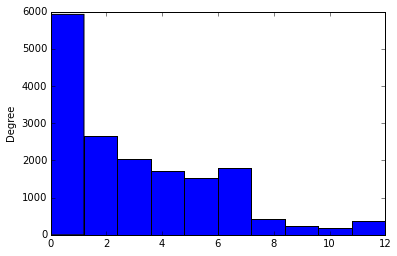

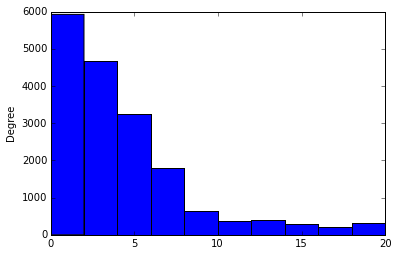

In [73]:
duration_nozeros_lte_12.astype('timedelta64[D]').plot(kind='hist')
plt.show()
duration_nozeros_lte_20.astype('timedelta64[D]').plot(kind='hist')

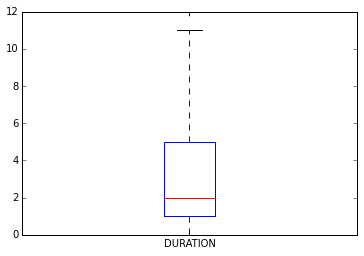

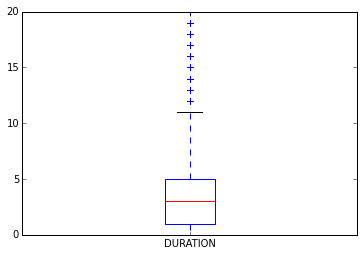

In [74]:
duration_nozeros_lte_12.astype('timedelta64[D]').plot(kind='box')
plt.show()
duration_nozeros_lte_20.astype('timedelta64[D]').plot(kind='box')

In [75]:
duration_nozeros_lte_20.astype('timedelta64[D]').describe()

count    17880.000000
mean         3.997483
std          3.925881
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         20.000000
Name: DURATION, dtype: float64

In [76]:
duration_nozeros_lte_12.astype('timedelta64[D]').describe()

count    16816.000000
mean         3.241556
std          2.529361
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         12.000000
Name: DURATION, dtype: float64

Later, I geocode pothole locations on the whole dataset, irrespective of whether or not it's been removed in this step.  Some geocode queries will be ultimately wasted.  Once I get the final, cleaned dataset here, I may have to do some sort of fancy join to get potholes that have geocodes.  Here I want to keep more variability in the data rather than less.  Why not go back to a larger cut-off?  I can do that later.  Now, I would just like to make sure that there aren't any strange empty row problems like it appears in the csv, before moving on to the plotting.

In [80]:
df_clean_nozeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19143 entries, 0 to 26737
Data columns (total 22 columns):
OBJECTID         19143 non-null int64
WOKEY            19143 non-null int64
WO_STATUS        19143 non-null object
LAST90DAYRPRD    19143 non-null int64
CURRENT_QTR      19143 non-null int64
PREVIOUS_1QTR    19143 non-null int64
PREVIOUS_2QTR    19143 non-null int64
PREVIOUS_3QTR    19143 non-null int64
PREVIOUS_4QTR    19143 non-null int64
INITDT           19143 non-null object
FLDSTARTDT       19143 non-null object
FLDENDDT         19143 non-null object
LOCATION         19143 non-null object
ADDRDESC         19143 non-null object
SHAPE            0 non-null float64
FLDSTARTDT_dt    19143 non-null datetime64[ns]
INITDT_dt        19143 non-null datetime64[ns]
FLDENDDT_dt      19143 non-null datetime64[ns]
IS_COMPLETED     19143 non-null bool
DATE_REVERSE     19143 non-null bool
DURATION         19143 non-null timedelta64[ns]
DURATION_td      19143 non-null float64
dtypes: bool(2

In [91]:
df_all = df_clean_nozeros[['OBJECTID','WOKEY','LOCATION','ADDRDESC','INITDT_dt','FLDSTARTDT_dt','FLDENDDT_dt','DURATION','DURATION_td']].copy()

In [92]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19143 entries, 0 to 26737
Data columns (total 9 columns):
OBJECTID         19143 non-null int64
WOKEY            19143 non-null int64
LOCATION         19143 non-null object
ADDRDESC         19143 non-null object
INITDT_dt        19143 non-null datetime64[ns]
FLDSTARTDT_dt    19143 non-null datetime64[ns]
FLDENDDT_dt      19143 non-null datetime64[ns]
DURATION         19143 non-null timedelta64[ns]
DURATION_td      19143 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 1.5+ MB


In [99]:
df_all.loc[3900:3950,:]

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td
3900,3901,6000,E. Denny and 23rd Ave. ...,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE ...,2010-04-21 07:00:00,2010-04-21 07:00:00,2010-04-23 07:00:00,2 days 00:00:00,2
3901,3902,249966,3800 LAKE WASHINGTON BLVD S ...,43RD AVE S BETWEEN LAKE WASHINGTON BLVD S AND ...,2014-01-21 08:00:00,2014-01-24 08:00:00,2014-01-24 08:00:00,3 days 00:00:00,3
3902,3903,45475,"5602 39th Ave W, , Seattle, WA ...",39TH AVE W BETWEEN W SHERIDAN ST AND W HOOKER ...,2010-12-23 08:00:00,2011-01-07 08:00:00,2011-01-07 08:00:00,15 days 00:00:00,15
3904,3905,271915,14TH AVE W &W HOWE ST \n\nFederal Ave E betwee...,14TH AVE W BETWEEN W HOWE ST AND W NEWTON ST ...,2014-04-29 07:00:00,2014-04-30 07:00:00,2014-04-30 07:00:00,1 days 00:00:00,1
3905,3906,217625,"3253 22ND AVE W, SEATTLE, WA 98199 ...",22ND AVE W BETWEEN W DRAVUS ST AND W BERTONA S...,2013-08-15 07:00:00,2013-08-20 07:00:00,2013-08-20 07:00:00,5 days 00:00:00,5
3906,3907,191658,8623 44th Ave S in front of address ...,44TH AVE S BETWEEN S CLOVERDALE ST AND S TRENT...,2013-03-15 07:00:00,2013-03-18 07:00:00,2013-03-18 07:00:00,3 days 00:00:00,3
3907,3908,175545,...,WESTERN AVE BETWEEN BELL ST AND BATTERY ST ...,2012-11-26 08:00:00,2012-11-27 08:00:00,2012-11-27 08:00:00,1 days 00:00:00,1
3909,3910,168299,3488 THORNDYKE AVE W ...,THORNDYKE AVE W BETWEEN W BERTONA ST AND 16TH ...,2012-10-09 07:00:00,2012-10-11 07:00:00,2012-10-11 07:00:00,2 days 00:00:00,2
3910,3911,213204,8036 43rd Ave NE between 80th and 82 ...,43RD AVE NE BETWEEN NE 80TH ST AND NE 82ND ST ...,2013-07-24 07:00:00,2013-07-25 07:00:00,2013-07-25 07:00:00,1 days 00:00:00,1
3911,3912,67404,Lakeview Park and Seward Park along Lake Washi...,SW KENYON ST BETWEEN 38TH AVE SW AND 39TH AVE ...,2011-05-27 07:00:00,2011-06-13 07:00:00,2011-06-13 07:00:00,17 days 00:00:00,17


In [104]:
# df_all.loc[3904,:]
len(df_all.ix[3904,'ADDRDESC'])

255

In [105]:
df_all.loc[3940:3950,:]

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td
3941,3942,49246,Beacon Ave S - S Columbian Way - ...,BEACON (E RD) AVE S BETWEEN S COLUMBIAN WAY AN...,2011-01-18 08:00:00,2011-02-16 08:00:00,2011-02-16 08:00:00,29 days 00:00:00,29
3942,3943,58069,56th N and Kensington Ave N ...,KENSINGTON PL N BETWEEN N 56TH ST AND N 57TH S...,2011-03-17 07:00:00,2011-03-23 07:00:00,2011-03-23 07:00:00,6 days 00:00:00,6
3943,3944,117061,63rd ave sw between Alki Ave. SW and Admiral W...,63RD AVE SW BETWEEN ALKI AVE SW AND SW ADMIRAL...,2012-05-10 07:00:00,2012-05-16 07:00:00,2012-05-16 07:00:00,6 days 00:00:00,6
3944,3945,106924,Aurora and North Park Avenues may be N 125th S...,N 125TH ST BETWEEN NORTH PARK AVE N AND INTERU...,2012-03-12 07:00:00,2012-03-14 07:00:00,2012-03-14 07:00:00,2 days 00:00:00,2
3945,3946,270032,"Travelling NorthEast on SandPoint Way NE, just...",SAND POINT WAY NE BETWEEN 55TH AVE NE AND NE 5...,2014-04-18 07:00:00,2014-04-24 07:00:00,2014-04-24 07:00:00,6 days 00:00:00,6
3946,3947,57068,100 Evanston Ave N ...,EVANSTON AVE N AND N 100TH ST ...,2011-03-12 08:00:00,2011-03-12 08:00:00,2011-03-25 07:00:00,12 days 23:00:00,12
3947,3948,122863,"3116 NE 125TH ST, SEATTLE, WA 98125\n\nwestbou...",NE 125TH ST BETWEEN LAKE CITY WAY NE AND 32ND ...,2012-06-12 07:00:00,2012-06-13 07:00:00,2012-06-13 07:00:00,1 days 00:00:00,1
3948,3949,271393,near curb in street ...,26TH AVE E BETWEEN BOYER AVE E AND E NEWTON ST...,2014-04-26 07:00:00,2014-05-01 07:00:00,2014-05-01 07:00:00,5 days 00:00:00,5
3949,3950,153158,...,S GRAHAM ST BETWEEN SWIFT AVE S AND 21ST AVE S...,2012-06-17 07:00:00,2012-06-19 07:00:00,2012-06-19 07:00:00,2 days 00:00:00,2
3950,3951,12101,...,15TH AVE NW BETWEEN NW 87TH ST AND HOLMAN RD N...,2010-06-07 07:00:00,2010-06-21 07:00:00,2010-06-21 07:00:00,14 days 00:00:00,14


This is about as clean as it gets for now.  I think the data is all ok.  I can pickle this, but the problem is going to be getting geocodes for these specific rows.  And by the way, stay away from the LOCATION field; it is more informal.  ADDRDESC has more tightly controlled stuff.

In [106]:
df_all.to_pickle('df_all_cleaned.pkl')